# Introduccion a matplotlib  
Es una biblioteca analoga a Matlab

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [19]:
l = load_iris()
df = pd.DataFrame(l['data'], columns=l.feature_names)
# DUDA: no era q no dejaba modificar el df?
df['target'] = l['target']
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [3]:
print(df['petal length (cm)'])

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64


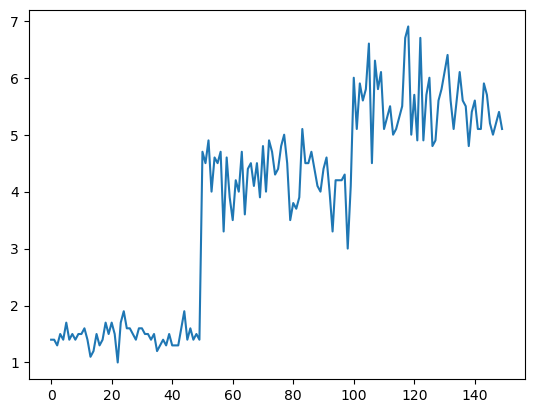

In [20]:
plt.plot(df['petal length (cm)'])

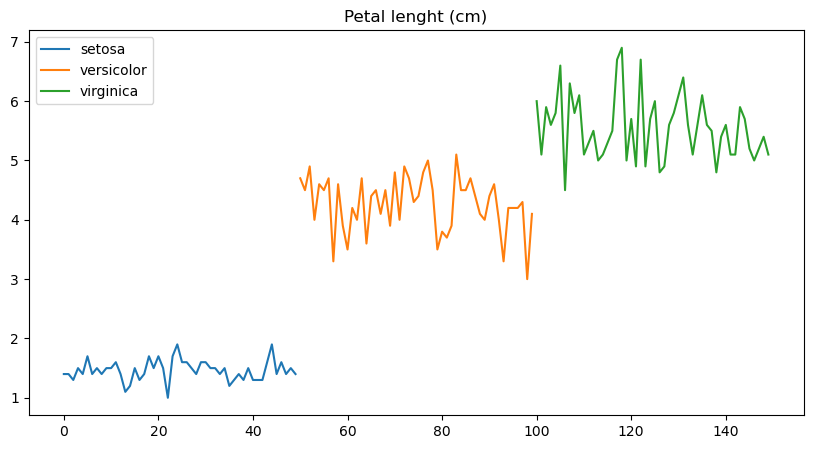

In [25]:
fig = plt.figure(figsize=(10,5))
#plt.plot(df['petal length (cm)'])
#plt.show()
#plt.plot(df.index,df['petal length (cm)'],'g')
#plt.plot(df.index, df['petal length (cm)'], color='green',
#         marker='o', linestyle='dashed',
#         linewidth=2, markersize=12)

# imprimo del d,f solo los de target=0, la columna pet.len, y con label con el nombre segun el nombre del target
plt.plot(df[df['target']==0]['petal length (cm)'], '-', label=l['target_names'][0])
plt.plot(df[df['target']==1]['petal length (cm)'], '-', label=l['target_names'][1])
plt.plot(df[df['target']==2]['petal length (cm)'], '-', label=l['target_names'][2])
plt.legend() # aplica las 3 etiquetas
plt.title('Petal lenght (cm)')
plt.show()

Imprimir  diferentes funciones

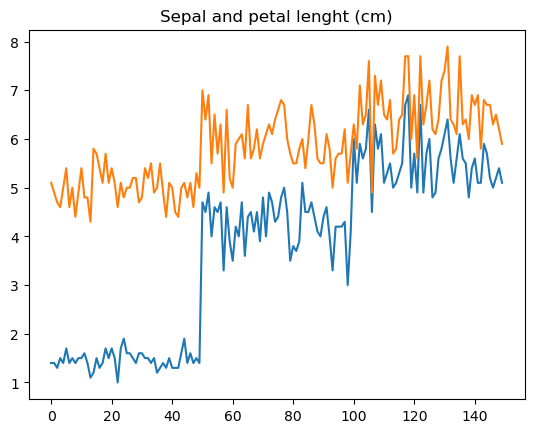

In [27]:
plt.title('Sepal and petal lenght (cm)')
plt.plot(df['petal length (cm)'])
plt.plot(df['sepal length (cm)'])
plt.show()

## Subplots

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(0, 0) sepal length (cm)
(0, 1) sepal width (cm)
(1, 0) petal length (cm)
(1, 1) petal width (cm)


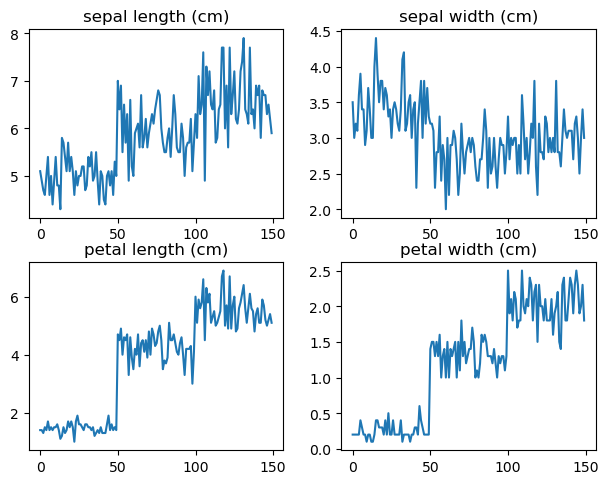

In [28]:
names = l['feature_names']
print(names)
# subplot() nos devuelve las figuras y los ejes. En este caso son 4 de cada uno. CREO q 4 figuras serian
fig, axs = plt.subplots(2, 2)
fig.tight_layout() # para ordenar los titulos CREO

axs[0,0].title.set_text(names[0])

# lo hacemos para los 4 ejes. Como el indice de axs tiene que cambiar en 0,0 0,1 10, etc
# hacemos lo siguiente, iteracion for con dos variables:
for an,n in zip(((0,0),(0,1),(1,0),(1,1)),names):
    print(an, n)
    axs[an].title.set_text(n)
    axs[an].plot(df[n])
    

En lugar de imprimir una columna en funcion de su indice, podemos imprimir una columna vs otra. En general estos graficos conviene imprimirlos con 'o', porque si no queda rara la traza. Por ejemplo.

Text(0, 0.5, 'sepal length (cm)')

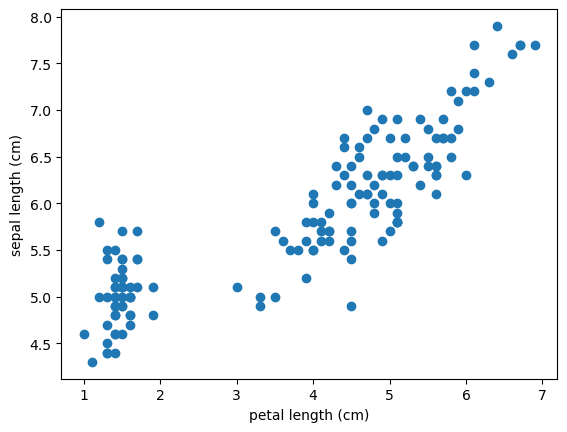

In [7]:
plt.plot(df['petal length (cm)'],df['sepal length (cm)'],'o')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')

## scatter  
permite imprimir con diferentes caracteristicas segun algun parametros. Por ejemplo, color segun target

Text(0, 0.5, 'sepal length (cm)')

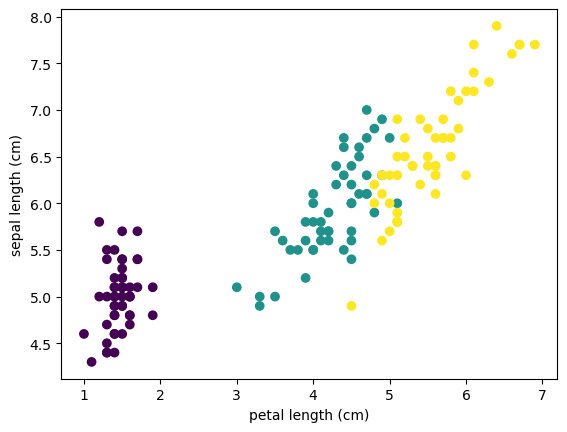

In [33]:
plt.scatter(df['petal length (cm)'], df['sepal length (cm)'],c=df['target'])
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')

# graficos 3D

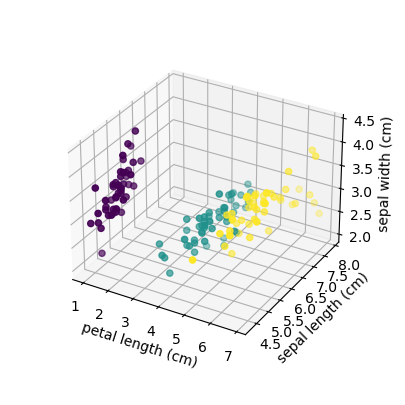

In [34]:

fig = plt.figure(figsize=(20,5))
ax = plt.axes(projection='3d')
ax.scatter(df['petal length (cm)'], df['sepal length (cm)'], df['sepal width (cm)'], c=df['target'])
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('sepal length (cm)')
ax.set_zlabel('sepal width (cm)')
ax.set_box_aspect(None, zoom=0.8) #TODO fix visibilidad nombre de los ejes. Si no, se cortan los nombres
plt.show()


# Grafico de barras  
Ademas, los df tienen un metodo .bar() que nos imprime el histograma

In [10]:
df.groupby(['target']).size()

target
0    50
1    50
2    50
dtype: int64

In [35]:
cantidad_de_ejemplos = df.groupby(['target']).size().to_list()
cantidad_de_ejemplos

[50, 50, 50]

In [39]:
clases_n = df.groupby(['target']).size().index.to_list()
clases_n

[0, 1, 2]

In [41]:
labels = l['target_names']
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
clases = [labels[n] for n in clases_n]
clases

['setosa', 'versicolor', 'virginica']

<BarContainer object of 3 artists>

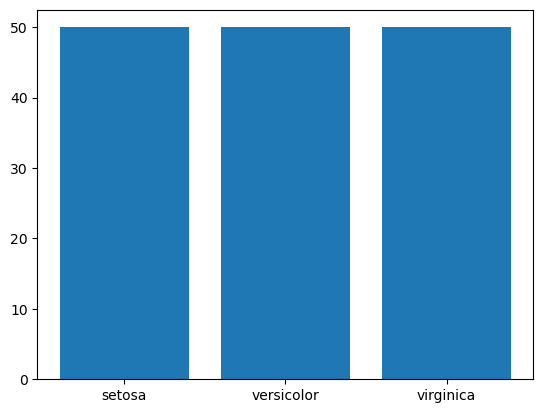

In [16]:
plt.bar(clases,cantidad_de_ejemplos)

In [54]:
# DUDA: no anda wget. Hago esto que encontre en stack overflow
# !pip install wget
#!wget -O covid_data.csv https://covid19.who.int/WHO-COVID-19-global-data.csv

import urllib.request
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
filename = 'covid_data.csv'
urllib.request.urlretrieve(url, filename)
print('file downloaded!')
covid_data = r'covid_data.csv' # covid file

file downloaded!


In [55]:
df = pd.read_csv("covid_data.csv")

In [56]:
#df.head()
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
316627,2023-08-26,ZW,Zimbabwe,AFRO,0,265721,0,5715
316628,2023-08-27,ZW,Zimbabwe,AFRO,0,265721,0,5715
316629,2023-08-28,ZW,Zimbabwe,AFRO,0,265721,0,5715
316630,2023-08-29,ZW,Zimbabwe,AFRO,0,265721,0,5715
316631,2023-08-30,ZW,Zimbabwe,AFRO,0,265721,0,5715


In [64]:
# ponemos condicion, del df, solo los de coutrycode AR
df[df['Country_code']=='AR'].tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
12019,2023-08-26,AR,Argentina,AMRO,0,10044957,0,130472
12020,2023-08-27,AR,Argentina,AMRO,0,10044957,0,130472
12021,2023-08-28,AR,Argentina,AMRO,0,10044957,0,130472
12022,2023-08-29,AR,Argentina,AMRO,0,10044957,0,130472
12023,2023-08-30,AR,Argentina,AMRO,0,10044957,0,130472


In [65]:
# doble condicion con and:
df[(df['Country_code']=='AR') & df['New_cases']>0].tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
11761,2022-12-11,AR,Argentina,AMRO,27119,9766975,7,130041
11768,2022-12-18,AR,Argentina,AMRO,62261,9829236,39,130080
11775,2022-12-25,AR,Argentina,AMRO,61903,9891139,44,130124
11824,2023-02-12,AR,Argentina,AMRO,1807,10042136,11,130448
11838,2023-02-26,AR,Argentina,AMRO,817,10044125,5,130463


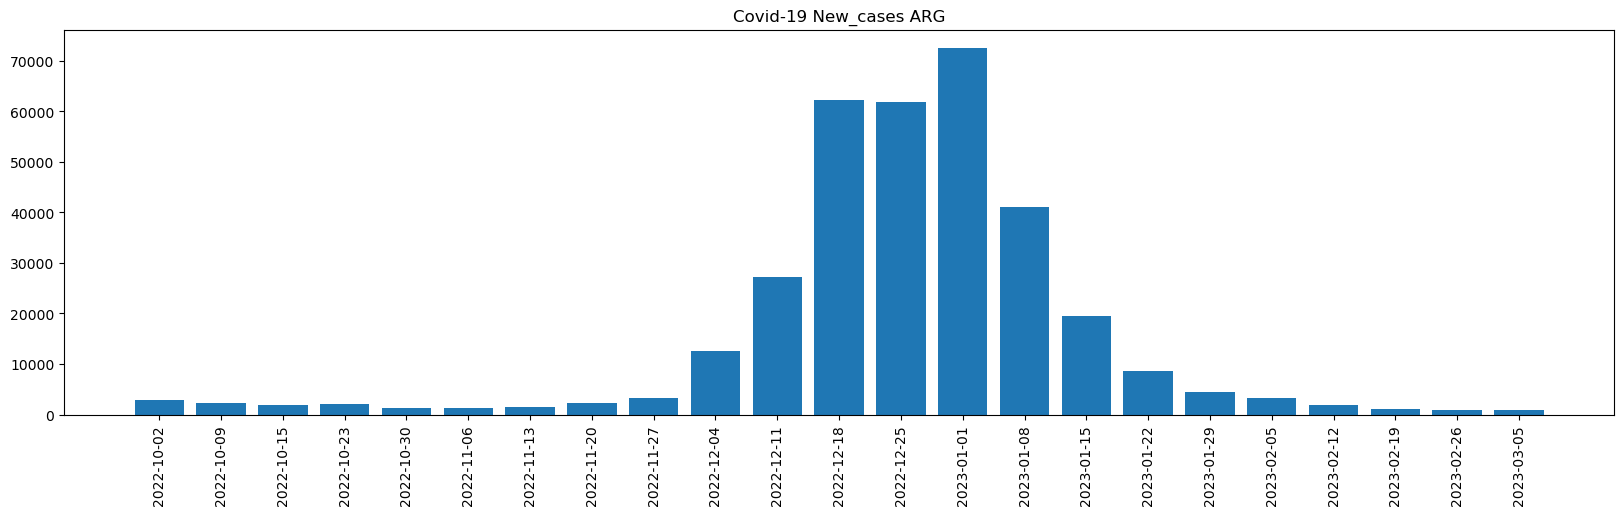

In [69]:
plt.figure(figsize=(20,5))
filtered = df[(df['Country_code']=='AR')&(df['New_cases']>0)&(df['Date_reported']>'2022-10-01')]
plt.title('Covid-19 New_cases ARG')
plt.xticks(rotation=90) # los labels del eje de absisas, los rota 90g
plt.bar(filtered['Date_reported'],filtered['New_cases']); # ';' para q no muestre el tipo de objeto


In [58]:
import numpy as np 

m:
 [[1 2 3]
 [4 5 6]]
m.shape:
 (2, 3)
arrange:
 [0 1]


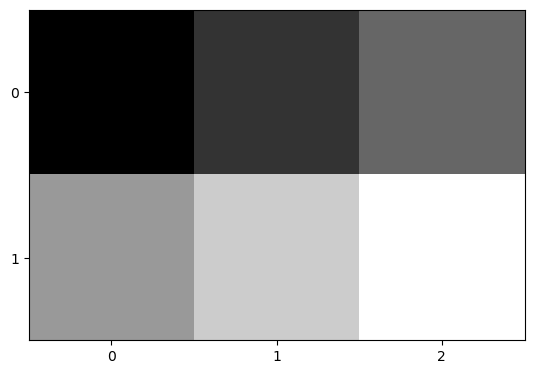

In [83]:

#m = np.array(np.mat('1 2 3; 4 5 6; 7 8 9'),dtype=float) # la inicializo con un string literal, o con lista, como a continuacion:
m = np.array([[1,2,3],[4,5,6]],dtype=int)
print('m:\n', m)
print('m.shape:\n', m.shape)
print('arrange:\n', np.arange(0, m.shape[0], 1))
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, m.shape[1], 1)) # idem abajo
ax.set_yticks(np.arange(0, m.shape[0], 1)) # para que los ylabels no tengan numeros con coma, le doy una lista con
# los valores de yticks. Desde 0, hasta m.shape[0], con pasos de a '1'
plt.imshow(m,cmap='gray',vmin=1,vmax=6)


DUDA: el grafico de arriba no lo entendi mucho

In [85]:
# !wget -O utn.png https://www.frba.utn.edu.ar/wp-content/uploads/2019/10/logo-UTNBA-PNC-2016-2019-e1570223041254.png
url = 'https://www.frba.utn.edu.ar/wp-content/uploads/2019/10/logo-UTNBA-PNC-2016-2019-e1570223041254.png'
filename = 'utn.png'
urllib.request.urlretrieve(url, filename)
print('file downloaded!')
utn = r'utn.png'

file downloaded!


In [89]:
import matplotlib.image as mpimg
img = mpimg.imread("utn.png") # este metodo devuelve un metodo imagen que es  un np.ndarray

In [87]:
type(img)

numpy.ndarray

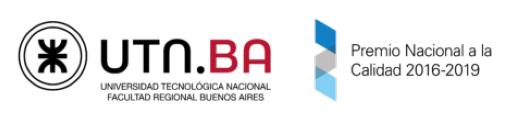

In [88]:
plt.axis("off")
plt.imshow(img);
#plt.show()

# Tutoriales matplotlib
https://matplotlib.org/stable/tutorials/introductory/quick_start.html  
https://matplotlib.org/stable/tutorials/introductory/pyplot.html